In [62]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

In [63]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

<Unit('kilogram')>

In [2]:
params = Params(G_const = 6.67408e-11 * m**3/(kg*s**2), m_e = 5.972e24 * kg, m_s = 1.989e30 * kg) # system

NameError: name 'Params' is not defined

In [65]:
def make_system(params):
    """Makes a System object for the given conditions.
    
    params: Params object
    
    returns: System object
    """
    G_const, m_e, m_s = params.G_const, params.m_e, params.m_s
    
    r_init = 149.6e9 * m
    v_init = 0 *m/s
    init = State(r=r_init, v=v_init)
    t_end = 3600 * 24 * 100 * s
    dt = t_end / 100
    
    return System(params, G_const=G_const, init=init, t_end=t_end, dt=dt)

In [66]:
system = make_system(params)

G_const      6.67408e-11 meter ** 3 / kilogram / second ** 2
m_e                                       5.972e+24 kilogram
m_s                                       1.989e+30 kilogram
init       r    149600000000.0 meter
v      0.0 meter / s...
t_end                                         8640000 second
dt                                            86400.0 second
dtype: object

In [67]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of y and v
    """
    r, v = state
    G_const, m_s = system.G_const, system.m_s
    
    accel = (G_const * m_s) / r**2
    
    drdt = v
    dvdt = - G_const * m_s / r**2
    
    return drdt, dvdt

In [68]:
slope_func(system.init, 0, system)

(0.0 <Unit('meter / second')>,
 -0.00593147909577054 <Unit('meter / second ** 2')>)

In [69]:
def event_func(state, t, system):
    r, v = state
    return r

In [70]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

success                             True
message    A termination event occurred.
dtype: object

In [71]:
results.head()

r                                   v
0.0           149600000000.0 meter                  0.0 meter / second
86400.0   149577860872.90463 meter   -512.4797938745746 meter / second
172800.0  149511436937.47714 meter   -1025.263098836451 meter / second
259200.0   149400688842.6613 meter  -1538.6543818132357 meter / second
345600.0   149245550867.2312 meter   -2052.960096377744 meter / second

In [72]:
results.tail()

r                                   v
5.270400e+06  36542038776.296616 meter    -74090.6292983068 meter / second
5.356800e+06  29769553538.081444 meter   -84496.11754051299 meter / second
5.443200e+06   21910002441.51194 meter  -101602.72652695786 meter / second
5.529600e+06  12099386348.186493 meter  -140936.47367582278 meter / second
5.596778e+06                 0.0 meter   -578088.5928502546 meter / second

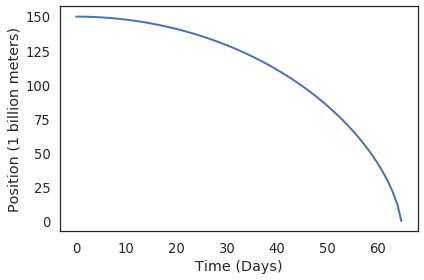

In [75]:
def plot_position(results):
    indexes = results.index / (60 * 60 * 24)
    radii = results.r / 1e9
    plot(indexes, radii)
    decorate(xlabel='Time (Days)',
             ylabel='Position (1 billion meters)')
    
plot_position(results)

In [74]:
get_last_label(results) / (3600 * 24)

64.77752403749415

# PART 2

In [113]:
def make_system2(params):
    """Makes a System object for the given conditions.
    
    params: Params object
    
    returns: System object
    """
    G_const, m_e, m_s = params.G_const, params.m_e, params.m_s
    
    r_init = Vector(0, 149.6e9) * m
    v_init = Vector(30000, 0) * m/s
    init = State(r=r_init, v=v_init)
    t_end = 3600 * 24 * 365 * s
    dt = t_end / 100
    
    return System(params, G_const=G_const, init=init, t_end=t_end, dt=dt)

In [114]:
system = make_system2(params)

G_const      6.67408e-11 meter ** 3 / kilogram / second ** 2
m_e                                       5.972e+24 kilogram
m_s                                       1.989e+30 kilogram
init       r               [0.0 meter, 149600000000.0 met...
t_end                                        31536000 second
dt                                           315360.0 second
dtype: object

In [115]:
def slope_func2(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of y and v
    """
    r, v = state
    G_const, m_s = system.G_const, system.m_s
        
    drdt = v
    dvdt = G_const * -r.hat() * m_s / r.mag**2
    return drdt, dvdt

In [116]:
slope_func2(system.init, 0, system)

(array([30000.,     0.]) <Unit('meter / second')>,
 array([-0.        , -0.00593148]) <Unit('meter / second ** 2')>)

In [117]:
def event_func2(state, t, system):
    r, v = state
    return r.mag

In [118]:
results, details = run_ode_solver(system, slope_func2, events=event_func2)
details

success                                                 True
message    The solver successfully reached the end of the...
dtype: object

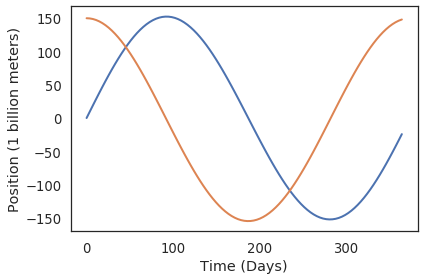

In [119]:
def plot_position2(results):
    indexes = results.index / (60 * 60 * 24)
    x = results.r.extract('x') / 1e9
    y = results.r.extract('y') / 1e9
    plot(indexes, x)
    plot(indexes, y)

    decorate(xlabel='Time (Days)',
             ylabel='Position (1 billion meters)')
    
plot_position2(results)

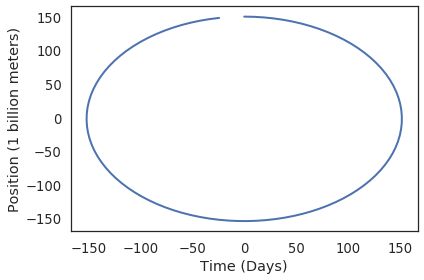

In [121]:
def plot_orbit(results):
    indexes = results.index / (60 * 60 * 24)
    x = results.r.extract('x') / 1e9
    y = results.r.extract('y') / 1e9
    plot(x, y)

    decorate(xlabel='Time (Days)',
             ylabel='Position (1 billion meters)')
    
plot_orbit(results)